# Regresion Polinomial

Para la regresion polinomial, se puede utilizar la regresion lineal para ajustar los datos no lineales. Una forma sencilla de hacerlo es añadir potencias de cada característica como nuevas características y, a continuación, entrenar un modelo lineal sobre este conjunto extendido de características.

Digamos que la ecuacion es:

$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x^2_2 + \theta_3 x^3_3 + ...
$$

Observamos que es similar a una ecuacion lineal, asi que podemos aplicar la regresion lineal, solamente que cambiamos las features como lo siguiente:

$$
[x_1, x_2, x_3, ...] \rightarrow [x_1, x^2_2, x^3_3, ...]
$$

Por lo tanto definimos:

$$
X_b =
\begin{bmatrix}
x_{(1)1} & x_{(2)1}^2 & x_{(3)1}^3 & ...\\
x_{(1)2} & x_{(2)2}^2 & x_{(3)2}^3 & ...\\
\vdots & \vdots & \vdots & \vdots \\
x_{(1)m} & x_{(2)m}^2 & x_{(3)m}^3 & ...
\end{bmatrix}
$$

entonces el modelo se puede escribir igual que antes:

$$
\hat{y} = X_b \theta
$$

Por lo tanto podemos aplicar todo lo aprendido en regresion Lineal.

### Implementacion con sklearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Datos no lineales
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Generar características polinomiales hasta grado 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Verificando que se agrego otra columna (termino cuadratico)
print(X.shape)
print(X_poly.shape)

# Entrenar modelo lineal sobre las nuevas features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print("Coeficientes:", lin_reg.coef_)
print("Intercepto:", lin_reg.intercept_)


(100, 1)
(100, 2)
Coeficientes: [[0.92998514 0.51099905]]
Intercepto: [1.86002862]


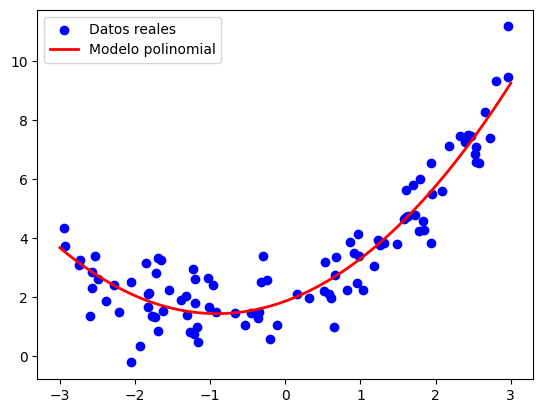

In [3]:
# Predicción y visualización
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly.transform(X_new)
y_pred = lin_reg.predict(X_new_poly)

plt.scatter(X, y, color='blue', label="Datos reales")
plt.plot(X_new, y_pred, color='red', linewidth=2, label="Modelo polinomial")
plt.legend()
plt.show()